# Logistic Regression with non-linear features

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [2]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1        = np.genfromtxt(fname_data1, delimiter=',')
data2        = np.genfromtxt(fname_data2, delimiter=',')

number_data1 = data1.shape[0]
number_data2 = data2.shape[0]

data1_point     = data1[:, 0:2]
data1_point_x   = data1_point[:, 0]
data1_point_y   = data1_point[:, 1]
data1_label     = data1[:, 2]

data2_point     = data2[:, 0:2]
data2_point_x   = data2_point[:, 0]
data2_point_y   = data2_point[:, 1]
data2_label     = data2[:, 2]

data1_label_class_0     = (data1_label == 0)
data1_label_class_1     = (data1_label == 1)

data2_label_class_0     = (data2_label == 0)
data2_label_class_1     = (data2_label == 1)

data1_point_x_class_0   = data1_point_x[data1_label_class_0]
data1_point_y_class_0   = data1_point_y[data1_label_class_0]

data1_point_x_class_1   = data1_point_x[data1_label_class_1]
data1_point_y_class_1   = data1_point_y[data1_label_class_1]

data2_point_x_class_0   = data2_point_x[data2_label_class_0]
data2_point_y_class_0   = data2_point_y[data2_label_class_0]

data2_point_x_class_1   = data2_point_x[data2_label_class_1]
data2_point_y_class_1   = data2_point_y[data2_label_class_1]

print('shape of point in data1 = ', data1_point.shape)
print('shape of point in data2 = ', data2_point.shape)

print('shape of label in data1 = ', data1_label.shape)
print('shape of label in data2 = ', data2_label.shape)

print('data type of point x in data1 = ', data1_point_x.dtype)
print('data type of point y in data1 = ', data1_point_y.dtype)

print('data type of point x in data2 = ', data2_point_x.dtype)
print('data type of point y in data2 = ', data2_point_y.dtype)
print(data1)

shape of point in data1 =  (1000, 2)
shape of point in data2 =  (1000, 2)
shape of label in data1 =  (1000,)
shape of label in data2 =  (1000,)
data type of point x in data1 =  float64
data type of point y in data1 =  float64
data type of point x in data2 =  float64
data type of point y in data2 =  float64
[[ 0.83159 -0.33906  0.     ]
 [ 0.87196  0.24418  0.     ]
 [ 1.01934  0.23241  0.     ]
 ...
 [ 2.01992 -0.31388  1.     ]
 [ 2.30028  0.22118  1.     ]
 [ 1.82426 -0.14913  1.     ]]


## plot the data

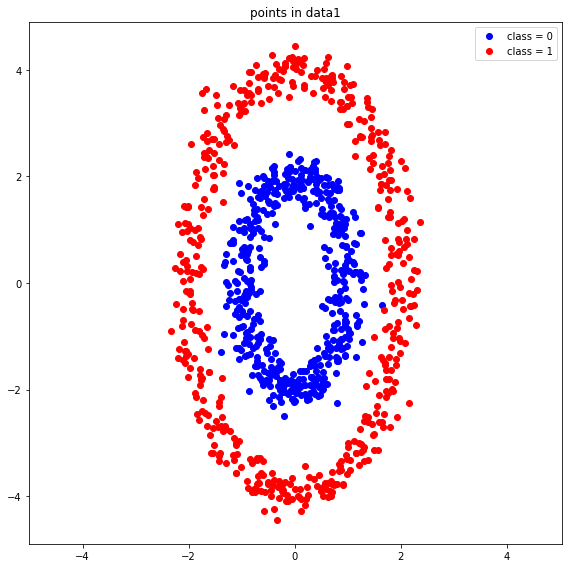

In [3]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data1')
plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

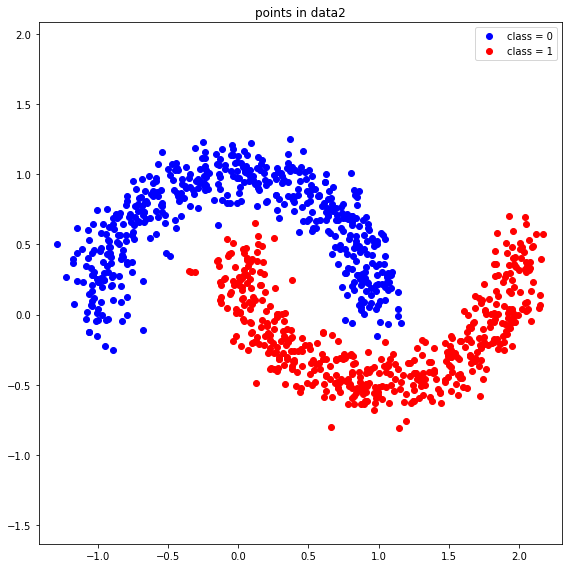

In [4]:
f = plt.figure(figsize=(8,8))   

plt.title('points in data2')
plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [5]:
def compute_feature1(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    
    t1=(x-np.mean(x))/np.max(x-np.mean(x))
    t2=(y-np.mean(y))/np.max(y-np.mean(y))
    t1 = t1*1.14 ## more precisely
    t2 = t2/0.88 ## more precisely for variance
    
    t3=np.power(t1,2)+np.power(t2,2)
    t3 = np.log2(t3)
    
    
    t3[486] -=0.6 ## recalculate for two congestion part point number 306 486 for accuracy
    t3[306] -=0.4 ## 
    
    
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,t3.T) #max(t3),min(t3)max(t1),min(t1),max(t2),min(t2)#
    #return feature
#print(compute_feature1(np.array( [ [1,2] ]))  )
#print(compute_feature1(data1_point))



In [6]:
def compute_feature2(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    x   = point[:, 0]
    y   = point[:, 1]
    # 
    # 
    # 
    # 
    # k= np.zeros(len(point))
    # error =1/2#1.77 # y value verses x for classifing
    # error2  = 1/4
   
    # a= np.sqrt(np.power((x+1),2) +np.power((1-error2-y)*error,2))
    # b= np.sqrt(np.power((x-5/12),2) +np.power((1-error2-y)*error,2))
    # c=np.sqrt(np.power((x+5/12),2) +np.power((-1+error2-y)*error,2))
    # d=np.sqrt(np.power((x-1),2) +np.power((-1+error2-y)*error,2))
    # e=np.sqrt(np.power((x+1/3),2) +np.power((-1+error2-y)*error,2))
    # f=np.sqrt(np.power((x-1/3),2) +np.power((1+error2-y)*error,2))
    
    

    t=np.power(x,3)*1.43-np.power(x,2)*1.97-0.41*x+0.77-y


    #a=1.8,b=-2.8 c=0.12 d=0.7






    # #a= np.power((x+5/6),2) +np.power((2/3-y),2)
    # #b= np.power((x-1/6),2) +np.power((2/3-y),2)
    # #c=np.power((x+1/6),2) +np.power((2/3+y),2)
    # #d=np.power((x-5/6),2) +np.power((2/3+y),2)
    # k= np.zeros(len(point))
    # for i in range(len(point)):
    #     k[i] = (a[i]+b[i]-c[i]-d[i])
        
        #k[i]=min(c[i],d[i],f[i])-min(a[i],b[i],e[i])
    
        #x   = point[:, 0]
        #y   = point[:, 1]
        #k=np.power(x,3)-(6/4)*(np.power(x,2))-(x/16)+15/32
        #k = 2*k-y
        #k -= (max(k)+min(k))/2

    #a1 = np.sqrt(np.power((x+3/4),2)+np.power((y-3/4),2))
    #b1 = np.sqrt(np.power((x-3/4),2)+np.power((y-3/4),2))
    #c1 = np.sqrt(np.power((x),2)+np.power((y+1/2),2))
    #d1 = np.sqrt(np.power((x-2),2)+np.power((y+1/2),2))
    #for i in range(1000):
        #k[i] = (c1[i]+d1[i]-a1[i]-b1[i])
        #k[i]=min(c1[i],d1[i])-min(a1[i],b1[i])
    # k-= (max(k)+min(k))/2
    # k= k *3/4
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    return (1,t)
    #return feature


#print(compute_feature2(data2_point))

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [7]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    value = np.dot(theta,feature)
    #value = theta[0]+theta[1]*feature[1]
    

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value#.shape #len(theta), len(feature)
#print(compute_linear_regression((0,1),compute_feature2(data2_point)))

## define sigmoid function with input

- $z \in \mathbb{R}$

In [8]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1+np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 
#sigmoid(compute_linear_regression((22.46221827, 22.46221827),compute_feature1(data1_point)))

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [9]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    value = sigmoid(compute_linear_regression(theta, feature))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value
#print(compute_logistic_regression((0.10248818, 0.10248818), compute_feature2(data2_point)))

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [10]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    residual = -label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual
#compute_residual((1,1),compute_feature2(data2_point),data2_label)

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [11]:
def compute_loss(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    loss = np.mean(-label*np.log(compute_logistic_regression(theta,feature))-(1-label)*np.log(1-compute_logistic_regression(theta,feature)))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss
#compute_loss((0,0),compute_feature2(data2_point),data2_label)

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [12]:
def compute_gradient(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    h_i=compute_logistic_regression(theta, feature)
    t1=(h_i-label)
    
    k=np.dot(feature[1],t1)
    gradient = (k)/len(label) ## point summation point*(hi-label)/n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient
#print(compute_gradient((-1.29607903,  2.78932097),compute_feature2(data2_point),data2_label))

## compute the accuracy of the prediction for point with a given model parameter

In [13]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t=compute_logistic_regression(theta, feature)
    count = 0
    lenz = len(label)
    for i in range(lenz):
        if t[i] >=0.5:
            discrimination = 1
        else:
            discrimination =0
        if label[i] == discrimination:
            count +=1
        #else:
            
            #print(feature[1][i])
            

    accuracy = (count/lenz)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy
#print(compute_accuracy((-1.29607903 , 2.78932097), compute_feature2(data2_point),data2_label))

## initialize the gradient descent algorithm

In [14]:
data1_number_iteration   = 1000
data2_number_iteration   = 500

data1_learning_rate   = 8.5 #7 0.0013242961020576746, 1 0.003915916473188206
data2_learning_rate   = 0.0006

data1_number_feature    = 2
data2_number_feature    = 2

theta1  = np.zeros(data1_number_feature)
theta2  = (0, 4)

data1_loss_iteration  = np.zeros(data1_number_iteration)
data2_loss_iteration  = np.zeros(data2_number_iteration)

data1_accuracy_iteration    = np.zeros(data1_number_iteration)
data2_accuracy_iteration    = np.zeros(data2_number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [15]:
for i in range(data1_number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature1 = compute_feature1(data1_point)
    loss=compute_loss(theta1, feature1, data1_label)
    
    theta1      = theta1-data1_learning_rate*compute_gradient(theta1, feature1, data1_label)
    loss1       =loss
    accuracy1 = compute_accuracy(theta1, feature1, data1_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data1_loss_iteration[i]     = loss1
    data1_accuracy_iteration[i] = accuracy1

data1_theta_optimal = theta1
#print(data1_accuracy_iteration[999])
#print(theta1)

#print(loss1)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [16]:
for i in range(data2_number_iteration):
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature2 = compute_feature2(data2_point)
    loss=compute_loss(theta2, feature2, data2_label)
    theta2      = theta2-data2_learning_rate*compute_gradient(theta2, feature2,data2_label)
    loss2       =loss
    accuracy2  = compute_accuracy(theta2,feature2,data2_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    data2_loss_iteration[i]     = loss2
    data2_accuracy_iteration[i] = accuracy2

data2_theta_optimal = theta2

#print(theta2)

#print(loss2)
#print(data2_accuracy_iteration[199])

___

___

## functions for presenting the results

___

___

In [17]:
def function_result_01():

    print("final loss for data1 = {:13.10f}".format(data1_loss_iteration[-1]))

In [18]:
def function_result_02():

    print("final loss for data2 = {:13.10f}".format(data2_loss_iteration[-1]))

In [19]:
def function_result_03():

    print("final accuracy for data1 = {:13.10f}".format(data1_accuracy_iteration[-1]))

In [20]:
def function_result_04():

    print("final accuracy for data2 = {:13.10f}".format(data2_accuracy_iteration[-1]))

In [21]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('loss for data1')

    plt.plot(data1_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [22]:
def function_result_06():

    plt.figure(figsize=(8,6))
    plt.title('loss for data2')

    plt.plot(data2_loss_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [23]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data1')

    plt.plot(data1_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [24]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('accuracy for data2')

    plt.plot(data2_accuracy_iteration, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\hajee\AppData\Local\Temp\ipykernel_20304\1697932679.py:71: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,levels=1,color='black')


None


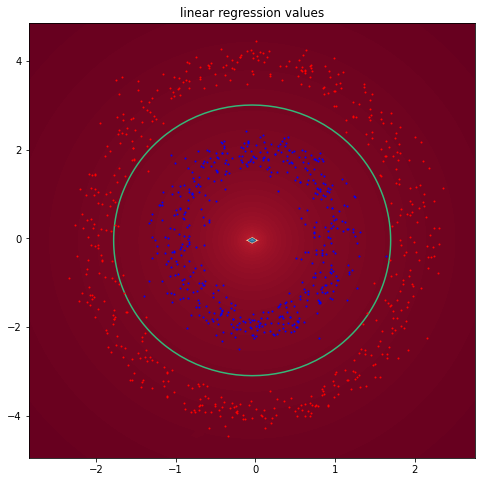

In [35]:
def function_result_09():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    # k=compute_linear_regression(theta1,compute_feature1(data1_point))
    # k1=k[:500]
    # k2 = k[500:]
    # #plt.plot(newk[:,0],newk[:,1],'o',markersize=4,color='blue')
    # plt.plot(k1,'o',markersize=4,color='blue')
    # plt.plot(k2,'o',markersize=4,color='red')

    # #for i in range(1000):
    #     #if(compute_linear_regression(theta1,compute_feature1(np.array([[XX,YY][i]])))==0):
    #         #a.append(XX,YY)
    # #print(a)
    # newX = np.arange(0,500,0.1)
    # newY = np.arange(0,1,0.1/500)
    # plt.plot(newX,newY,'-')
    # plt.axis('equal')
    # plt.legend()
    # plt.tight_layout()
    # plt.show()
    
    # x_num=int(np.round(10*(max_x+1-min_x),0))
    # y_num =int(np.round(10*(max_y+1-min_y),0))
    # k=np.zeros([y_num,x_num])
    # print(k.shape)
    # x = []
    # y = []
    # print(XX.shape,YY.shape)
    # for i in range(1,y_num):
    #      for j in range(1,x_num):
    #          newx =(min_x-0.5) + 0.1*j
    #          newy = (min_y-0.5) + 0.1*i
    #          new_xy=np.array([[newx,newy]])
    #          k[i][j]= compute_linear_regression(theta1, np.array([1,[new_xy]]))
    # zmesh = k
    XXX = XX.reshape((-1,1))
    
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature1(XY)
    #print(new)
    #print(new[1].shape) #5643
    ones =np.ones([5643])
    #print(XX.shape)
    
    zmesh = compute_linear_regression(theta1,new).reshape(XX.shape)
    
    #print(zmesh)
    
    
            
    plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contourf(XX,YY,zmesh, levels =1000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels=1,color='black')
    
    




    # XY = np.array([XX.flatten(),YY.flatten()]).T
    
    #
    
   
    # for i in range(1,y_num):
    #     for j in range(1,x_num):
    #         newx =(min_x-0.5) + 0.1*j
    #         newy = (min_y-0.5) + 0.1*i
    #         new_xy=np.array([[newx,newy]])
    #         k[j][i]= compute_linear_regression(theta1, np.array(compute_feature1(new_xy)))
    #         if k[j][i] == 0 :
    #             x.append(j)
    #             y.append(i)
    # zmesh = k

    
    # plt.plot(k[:,0],k[:,1], 'o', markersize=4, color='blue')
    # #h=plt.contourf(XX,YY,zmesh.T, levels = 1000 , cmap ="RdBu_r")
    # #plt.colorbar(h)
    # plt.plot(x,y,'-')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    

#min_x   = np.min(data1_point_x)
# max_x   = np.max(data1_point_x)
# min_y   = np.min(data1_point_y)
# max_y   = np.max(data1_point_y)
# X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
# Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

# [XX, YY] = np.meshgrid(X, Y)

#     # ++++++++++++++++++++++++++++++++++++++++++++++++++
#     # complete the blanks
#     #
# XY = np.array([XX.flatten(),YY.flatten()]).T
# k1=np.array(compute_feature1((XY)))
# k=compute_linear_regression(theta1, k1)
# x_num=np.round(10*(max_x+1-min_x),0)
# y_num =np.round(10*(max_y+1-min_y),0)
# print(max_x+0.5,min_x-0.5,max_y+0.5,min_y-0.5)
# print(x_num,y_num)


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


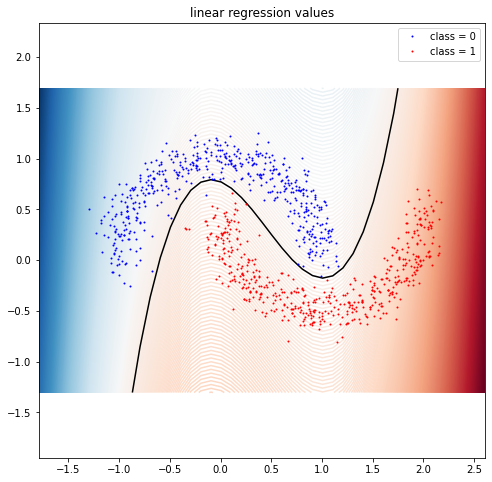

In [32]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('linear regression values')
    
    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    #X = np.arange(min_x - 0.5, max_x + 0.5, (max_x+1-min_x)/1000) 
    #Y = np.arange(min_y - 0.5, max_y + 0.5, (max_y+1-min_y)/1000) 
    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate
    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    #print(new)
    #print(new[1].shape) #5643
    #print(XX.shape,YY.shape)
    XY =np.array([XX.flatten(),YY.flatten()]).T
    #print(XY.shape)
    new=compute_feature2(XY)
    
    #print(new[1].shape)
    
    zmesh = compute_linear_regression(theta2,new).reshape(XX.shape)
    #print(zmesh)
    

    
    
            
    plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels=1000, cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')
    #plt.contour(XX,YY,compute_linear_regression(theta2,[1,(XY)]))
    #h=plt.contour(XX,YY,zmesh, levels =1000 , cmap ="RdBu_r")
    
    
    
    # x_num=int(np.round(10*(max_x+1-min_x),0))
    # y_num =int(np.round(10*(max_y+1-min_y),0))
    # k=np.zeros([x_num,y_num])
    
    # #for i in range(x_num):
    #     #for j in range(y_num):
    #         #t1=XX[0][i]
    #         #t2 = YY[0][j]
    #         #special_point=compute_feature2(np.asarray([[t1,t2]]))
    #         #k[i][j] =compute_linear_regression(theta2,special_point)
    
    
    # k=compute_linear_regression(theta2,compute_feature2(data2_point))
    # k1=k[:500]
    # k2 = k[500:]
    
    # plt.plot(k1,'o',markersize=4,color='blue')
    # plt.plot(k2,'o',markersize=4,color='red')
    # z=np.zeros([1000,1000])
    # for i in range(1000):
    #     for j in range(1000):
    #         z[i][j]= theta2[0]*1 + np.dot(theta2[1],X[i])+np.dot(theta2[1],Y[j])
    # print(compute_feature2(data2_point)[1].shape)
    # print(z.shape)
    # h=plt.contourf(X/2,compute_feature2(data2_point)[1],z, levels = 50 , cmap ="RdBu_r")
    # plt.xlabel('number for data class 0 is -500')
    # plt.ylabel('linear regression value')
    # plt.colorbar(h)
    # h=plt.contourf(XX,YY,zmesh, levels = 1000 , cmap ="RdBu_r")
   
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    plt.axis('equal')
    plt.legend()
    
    
    plt.show()


## plot the logistic regression values over the 2-dimensional Euclidean space

C:\Users\hajee\AppData\Local\Temp\ipykernel_20304\2920855371.py:6: RuntimeWarning: overflow encountered in exp
  value = 1/(1+np.exp(-z))
C:\Users\hajee\AppData\Local\Temp\ipykernel_20304\3865810707.py:35: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,color='black')


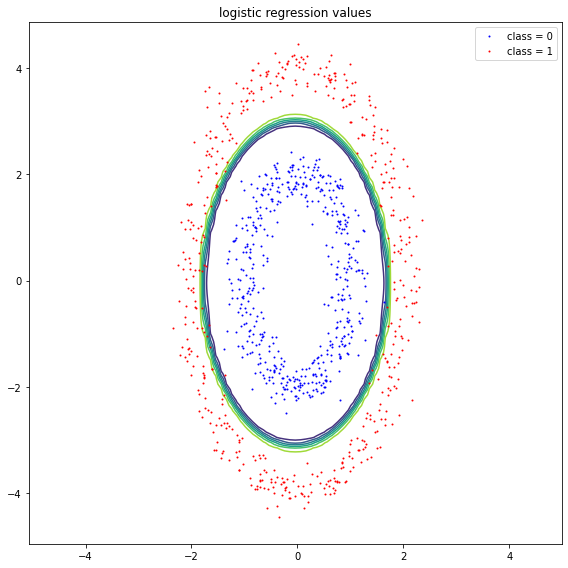

In [27]:
def function_result_11():

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')
    
    min_x   = np.min(data1_point_x)
    max_x   = np.max(data1_point_x)
    min_y   = np.min(data1_point_y)
    max_y   = np.max(data1_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    XY =np.array([XX.flatten(),YY.flatten()]).T
    new=compute_feature1(XY)
    #print(new)
    #print(new[1].shape) #5643
    
    #print(XX.shape)
    
    zmesh = compute_logistic_regression(theta1,new).reshape(XX.shape)
    
    #print(zmesh)
    
    
            
    plt.plot(data1_point_x_class_0, data1_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data1_point_x_class_1, data1_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    #plt.contour(XX,YY,zmesh, levels =1000 , cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,color='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
function_result_11()

In [28]:
def function_result_12():
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    plt.title('logistic regression values')

    min_x   = np.min(data2_point_x)
    max_x   = np.max(data2_point_x)
    min_y   = np.min(data2_point_y)
    max_y   = np.max(data2_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) # USE THIS VALUE for the range of x values in the construction of coordinate
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) # USE THIS VALUE for the range of y values in the construction of coordinate

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    #print(XX.shape,YY.shape)
    XY =np.array([XX.flatten(),YY.flatten()]).T
    #print(XY.shape)
    new=compute_feature2(XY)
    
    #print(new[1].shape)
    
    zmesh = compute_logistic_regression(theta2,new).reshape(XX.shape)
    #print(zmesh)
    

    
    
            
    plt.plot(data2_point_x_class_0, data2_point_y_class_0, 'o',markersize=1, color='blue', label='class = 0')
    plt.plot(data2_point_x_class_1, data2_point_y_class_1, 'o',markersize=1, color='red', label='class = 1')
    plt.contour(XX,YY,zmesh, levels=1000, cmap ="RdBu_r")
    plt.contour(XX,YY,zmesh,levels = 1 , colors='black')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
#function_result_12()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final loss for data1 =  0.0012133085
**************************************************
## [RESULT 02]
**************************************************
final loss for data2 =  0.1214654850
**************************************************
## [RESULT 03]
**************************************************
final accuracy for data1 =  1.0000000000
**************************************************
## [RESULT 04]
**************************************************
final accuracy for data2 =  0.9990000000
**************************************************
## [RESULT 05]
**************************************************


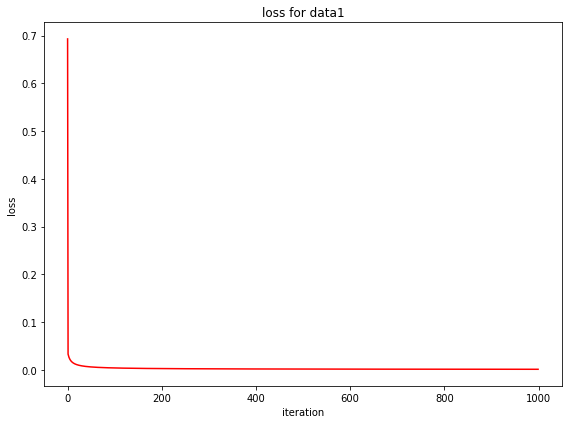

**************************************************
## [RESULT 06]
**************************************************


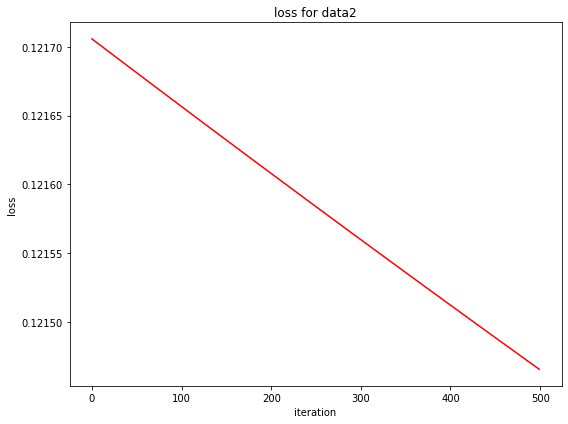

**************************************************
## [RESULT 07]
**************************************************


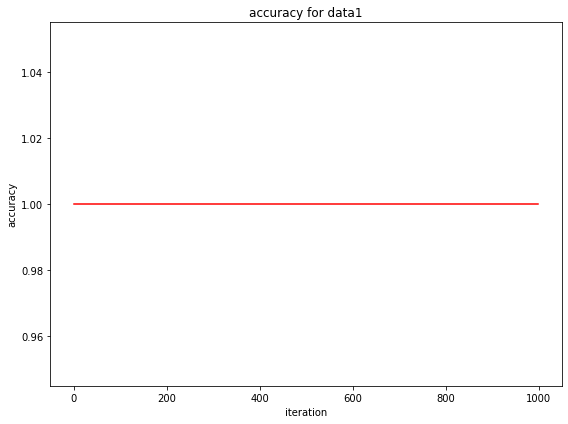

**************************************************
## [RESULT 08]
**************************************************


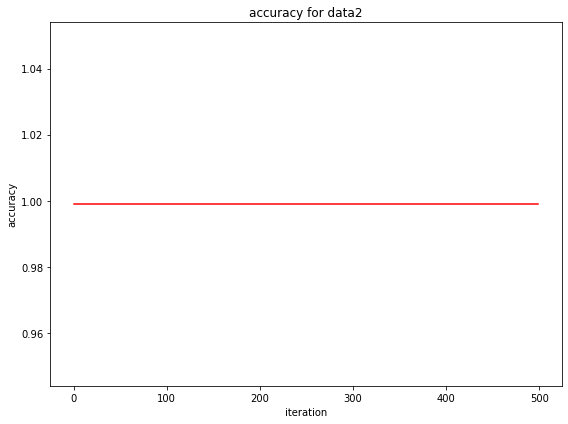

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\hajee\AppData\Local\Temp\ipykernel_20304\4055944611.py:71: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,color='black')
<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


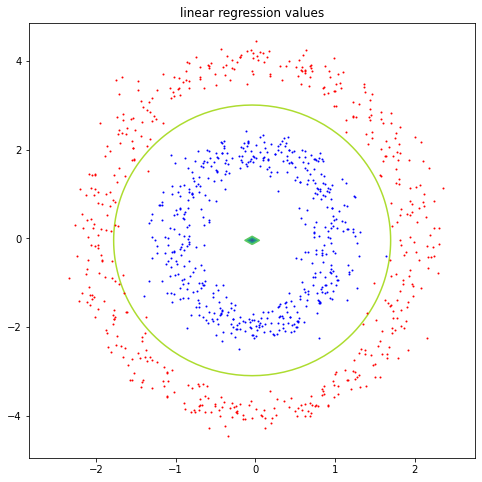

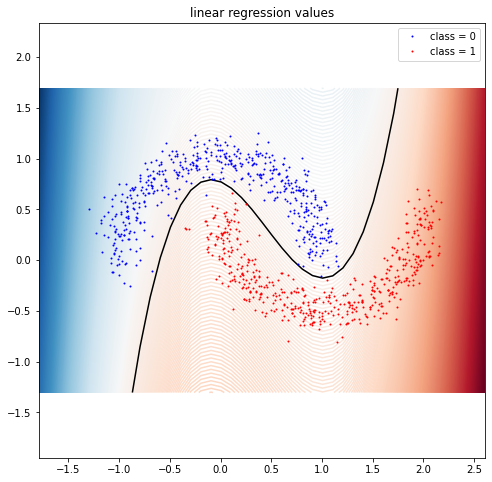

**************************************************
## [RESULT 11]
**************************************************


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\hajee\AppData\Local\Temp\ipykernel_20304\2920855371.py:6: RuntimeWarning: overflow encountered in exp
  value = 1/(1+np.exp(-z))
C:\Users\hajee\AppData\Local\Temp\ipykernel_20304\3865810707.py:35: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX,YY,zmesh,color='black')


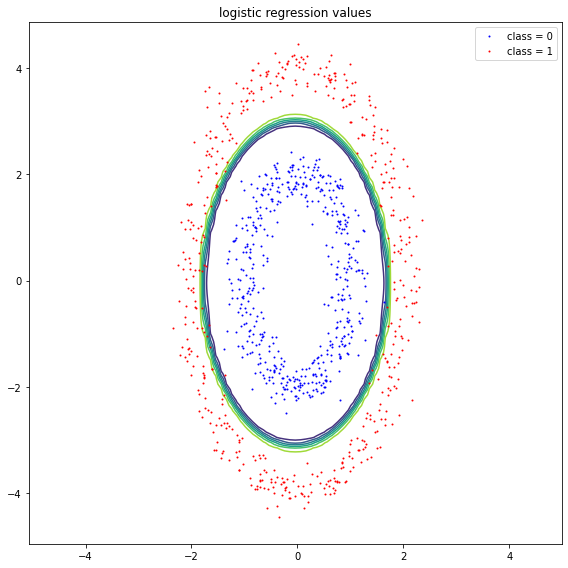

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Locator attempting to generate 1001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


**************************************************
## [RESULT 12]
**************************************************


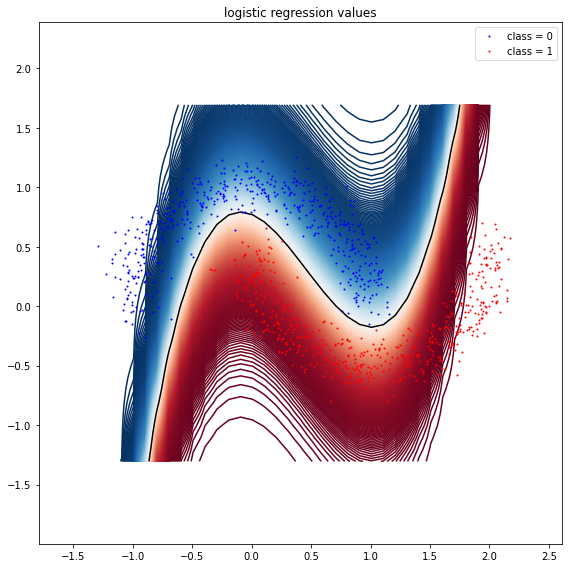

In [29]:
number_result = 12

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)